In [87]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [97]:
df = pd.read_csv('data.csv')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [90]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [98]:
df.timestamp = pd.to_datetime(df.timestamp)

df.insert(1, 'date', df['timestamp'].dt.date)
df.insert(2,'year', df['timestamp'].dt.year)
df.insert(3, 'month', df['timestamp'].dt.month)
df.insert(4, 'day', df['timestamp'].dt.day)
df.insert(5, 'time', df['timestamp'].dt.time)
df.insert(6, 'hour', pd.DatetimeIndex(df["timestamp"]).hour)

df.insert(14, "cnt", df.pop("cnt"))

In [99]:
df.head()

,timestamp,date,year,month,day,time,hour,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,cnt,season
0,2015-01-04 00:00:00,2015-01-04,2015,1,4,00:00:00,0,3.0,2.0,93.0,6.0,3.0,0.0,1.0,182,3.0
1,2015-01-04 01:00:00,2015-01-04,2015,1,4,01:00:00,1,3.0,2.5,93.0,5.0,1.0,0.0,1.0,138,3.0
2,2015-01-04 02:00:00,2015-01-04,2015,1,4,02:00:00,2,2.5,2.5,96.5,0.0,1.0,0.0,1.0,134,3.0
3,2015-01-04 03:00:00,2015-01-04,2015,1,4,03:00:00,3,2.0,2.0,100.0,0.0,1.0,0.0,1.0,72,3.0
4,2015-01-04 04:00:00,2015-01-04,2015,1,4,04:00:00,4,2.0,0.0,93.0,6.5,1.0,0.0,1.0,47,3.0


C:\Users\belug\AppData\Local\Temp\ipykernel_4356\938353000.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df.season, palette="icefire");


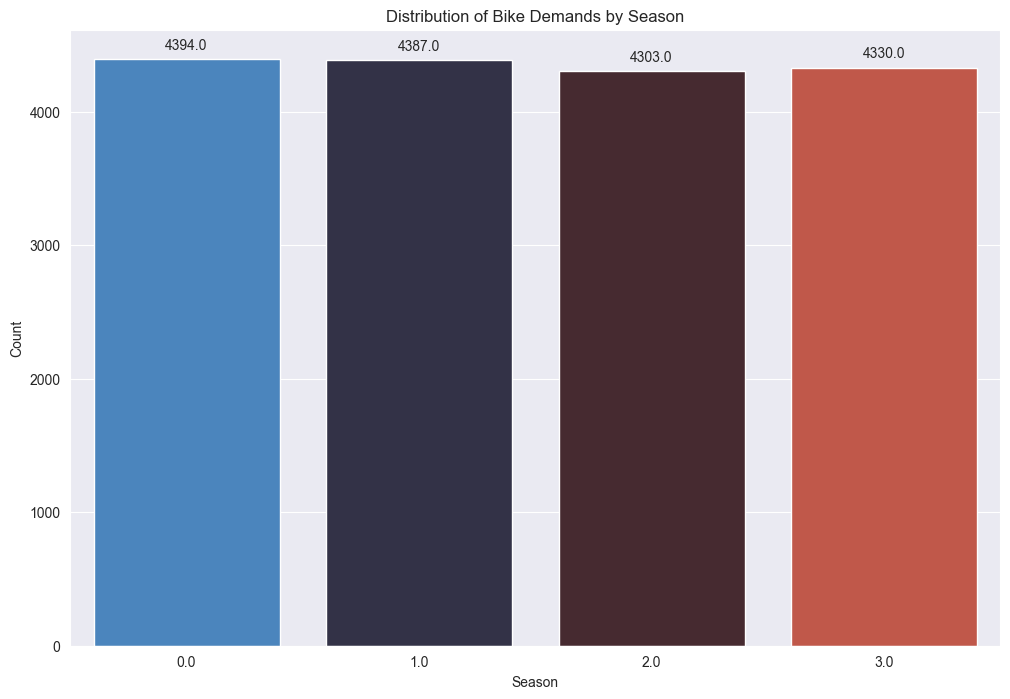

In [7]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x = df.season, palette="icefire");
plt.title('Distribution of Bike Demands by Season')
plt.xlabel('Season')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

C:\Users\belug\AppData\Local\Temp\ipykernel_4356\2140405121.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df.weather_code, palette="tab20");


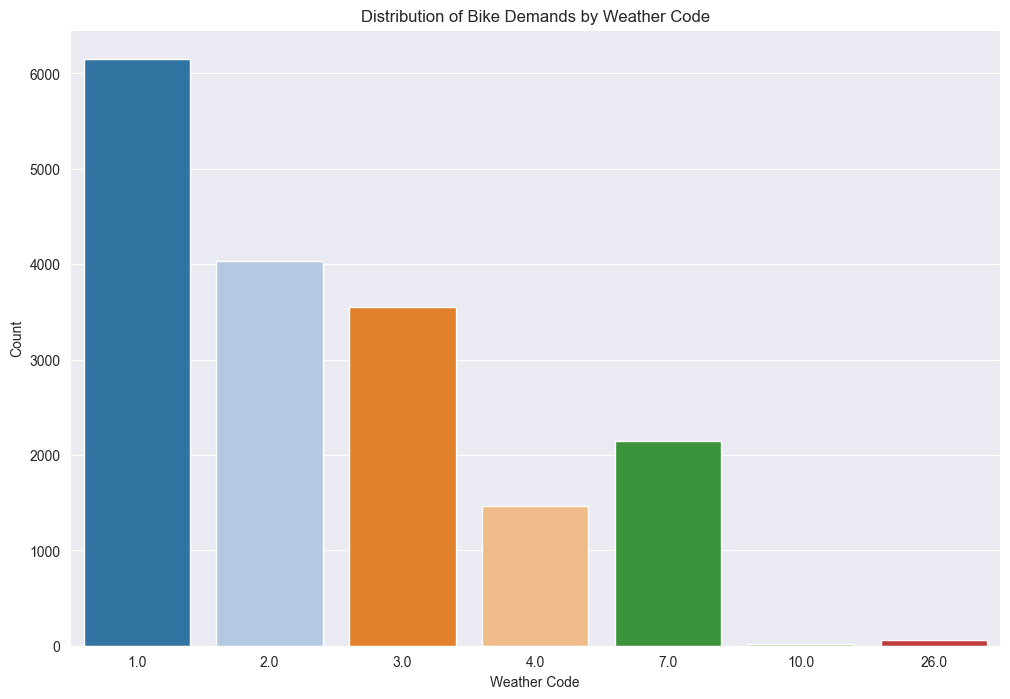

In [8]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x = df.weather_code, palette="tab20");
plt.title('Distribution of Bike Demands by Weather Code')
plt.xlabel('Weather Code')
plt.ylabel('Count')
plt.show()

C:\Users\belug\AppData\Local\Temp\ipykernel_4356\3001128669.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df.is_holiday, palette="plasma");


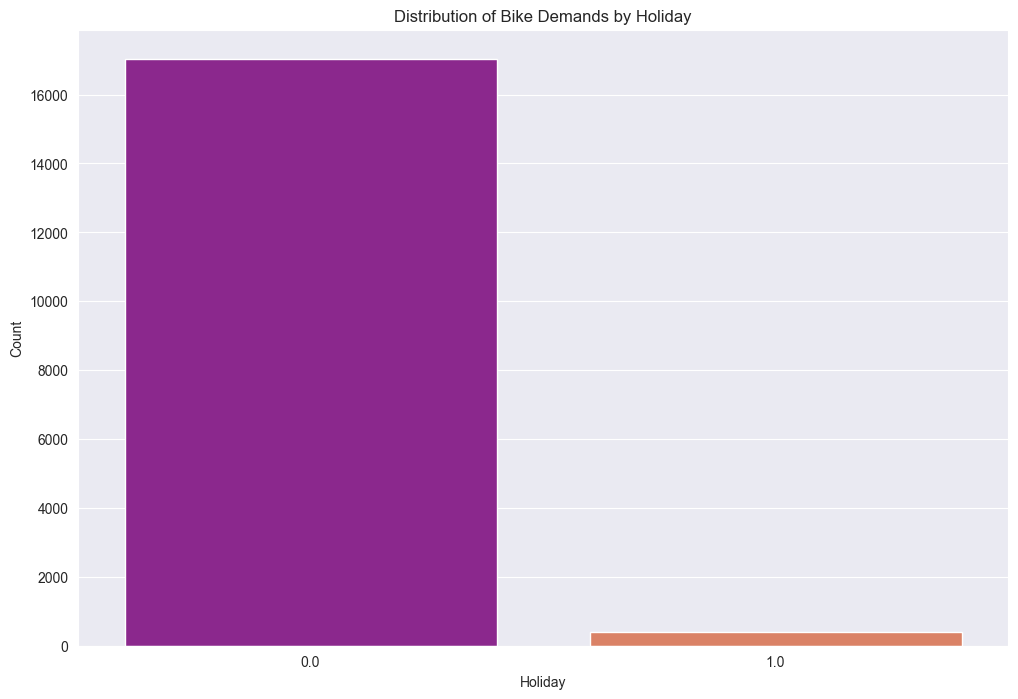

In [9]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x = df.is_holiday, palette="plasma");
plt.title('Distribution of Bike Demands by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Count')



plt.show()

C:\Users\belug\AppData\Local\Temp\ipykernel_4356\105100637.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df.is_weekend, palette="cool");


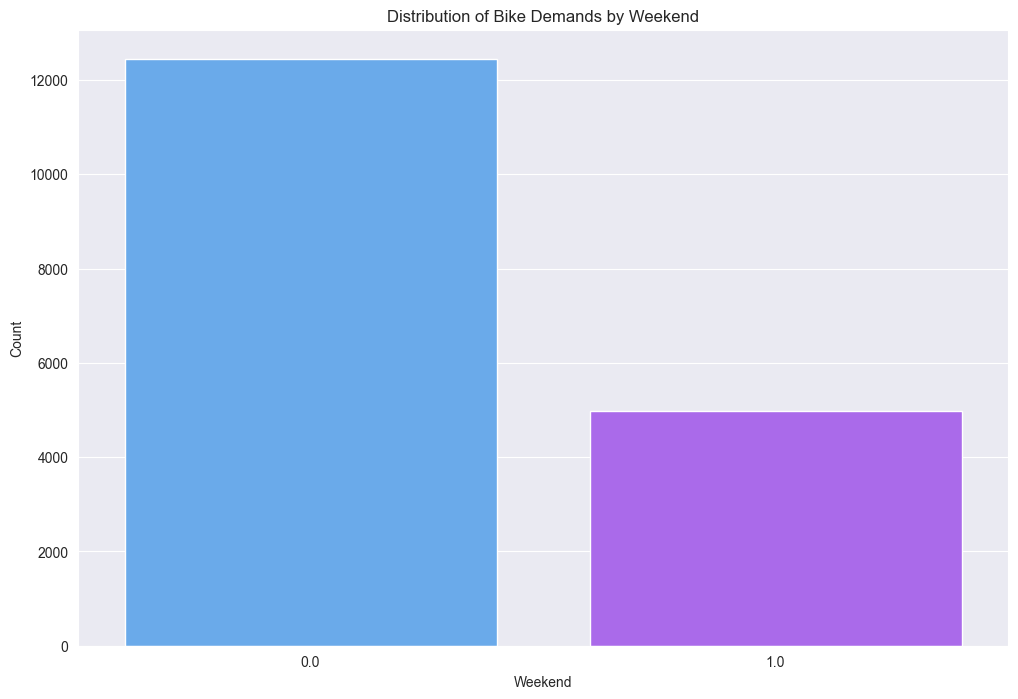

In [10]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x = df.is_weekend, palette="cool");
plt.title('Distribution of Bike Demands by Weekend')
plt.xlabel('Weekend')
plt.ylabel('Count')


plt.show()

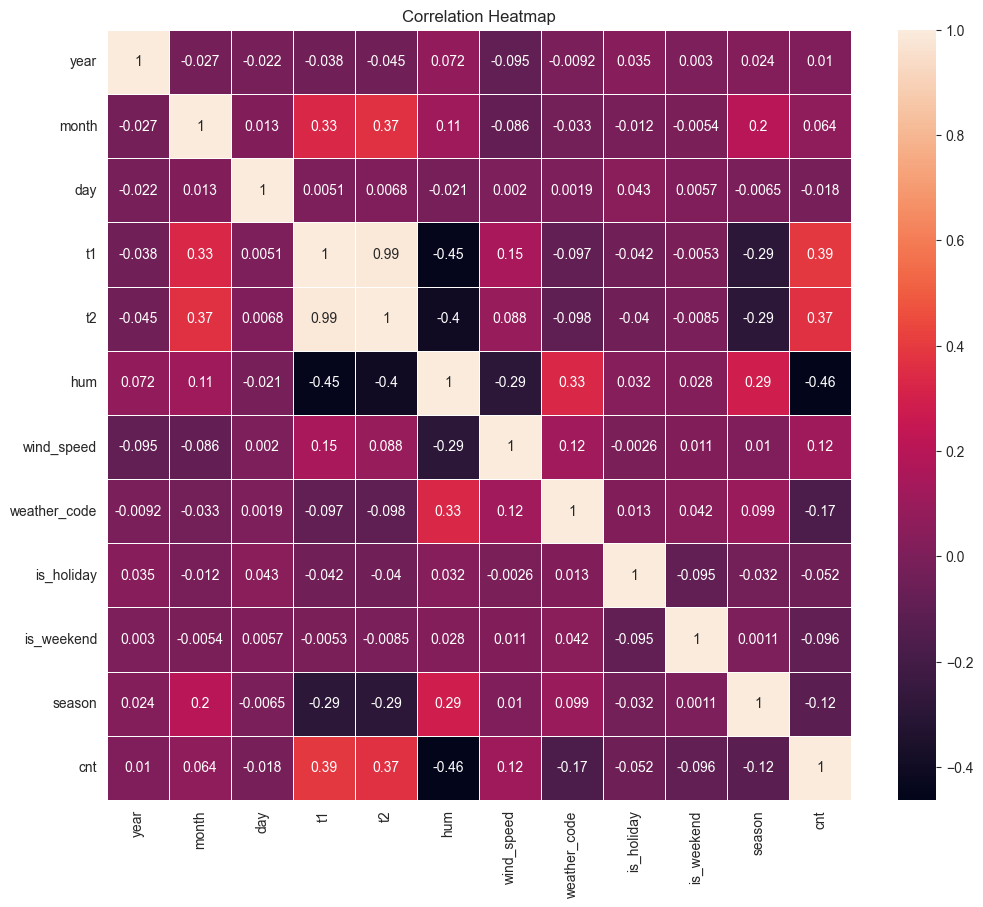

In [13]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes("number").corr(), annot=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\belug\AppData\Local\Temp\ipykernel_4356\3231607122.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=correlation_with_cnt.index, y=correlation_with_cnt.values, palette='plasma')


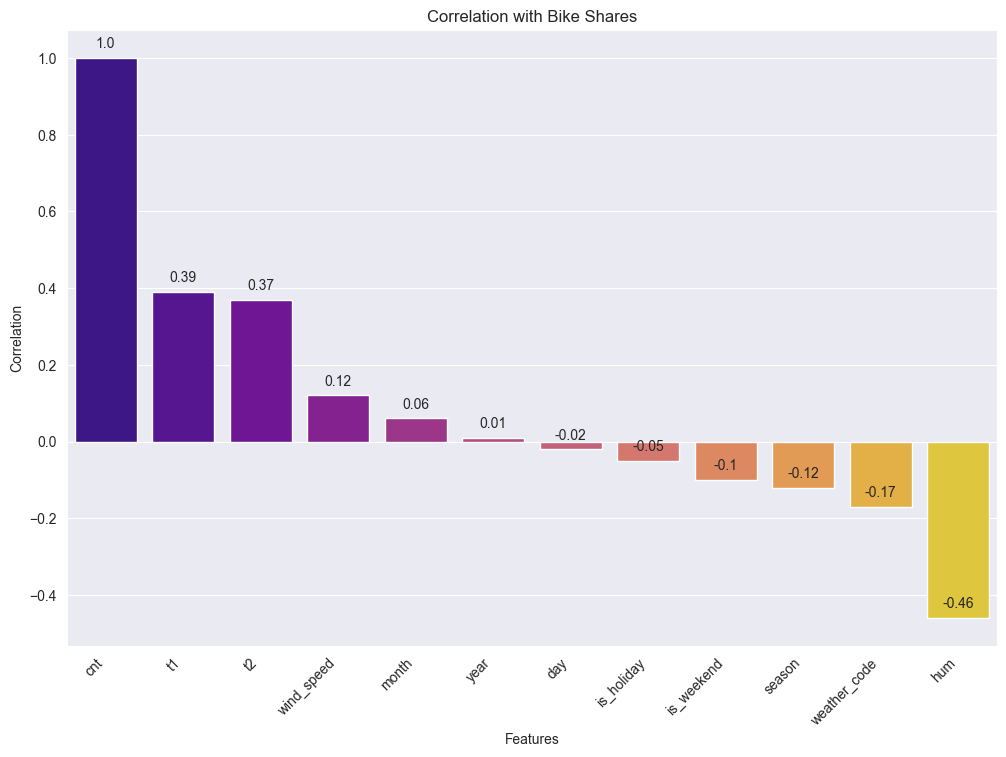

In [14]:
correlation_matrix = round(df.select_dtypes("number").corr(), 2)

correlation_with_cnt = correlation_matrix['cnt'].sort_values(ascending=False)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=correlation_with_cnt.index, y=correlation_with_cnt.values, palette='plasma')
plt.title('Correlation with Bike Shares')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

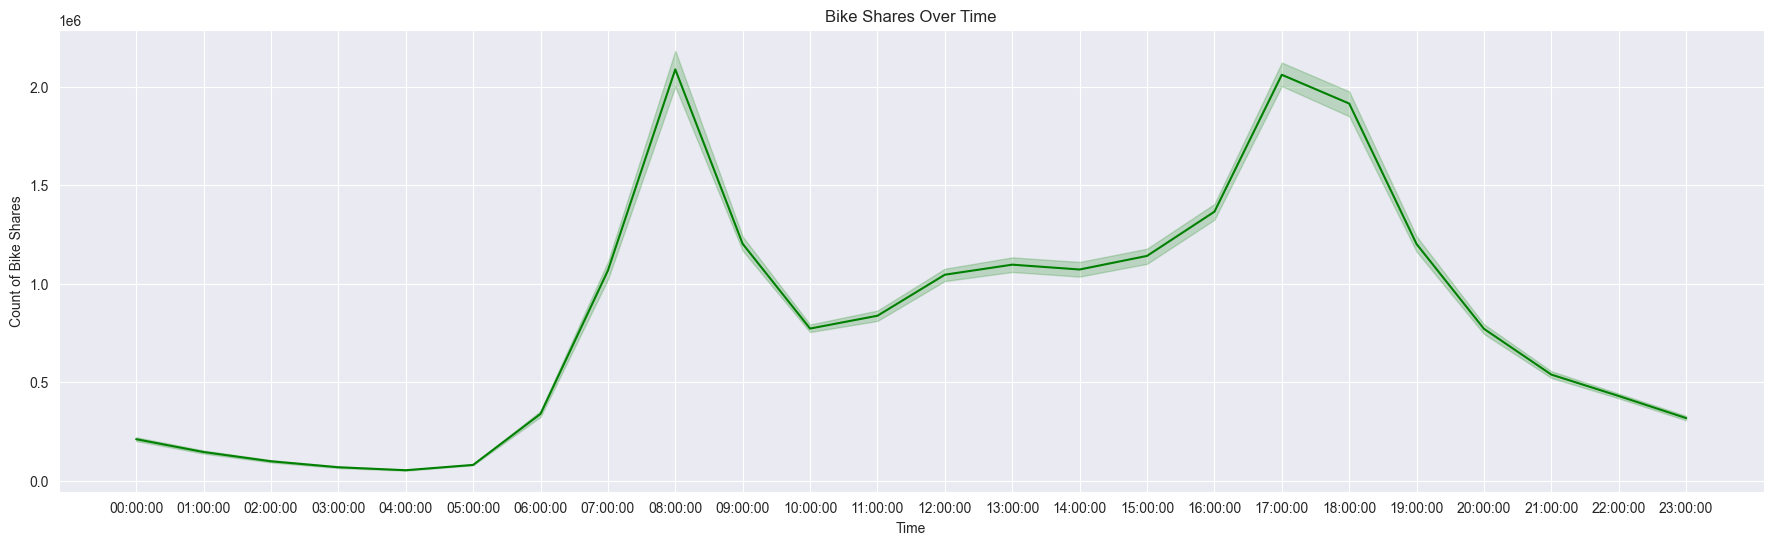

In [15]:
plt.figure(figsize=(22, 6))
sns.lineplot(x=df.time.astype(str), y='cnt', data=df, color='green', markers=True, estimator=sum)
plt.title('Bike Shares Over Time')
plt.xlabel('Time')
plt.ylabel('Count of Bike Shares')
plt.tight_layout
plt.show()

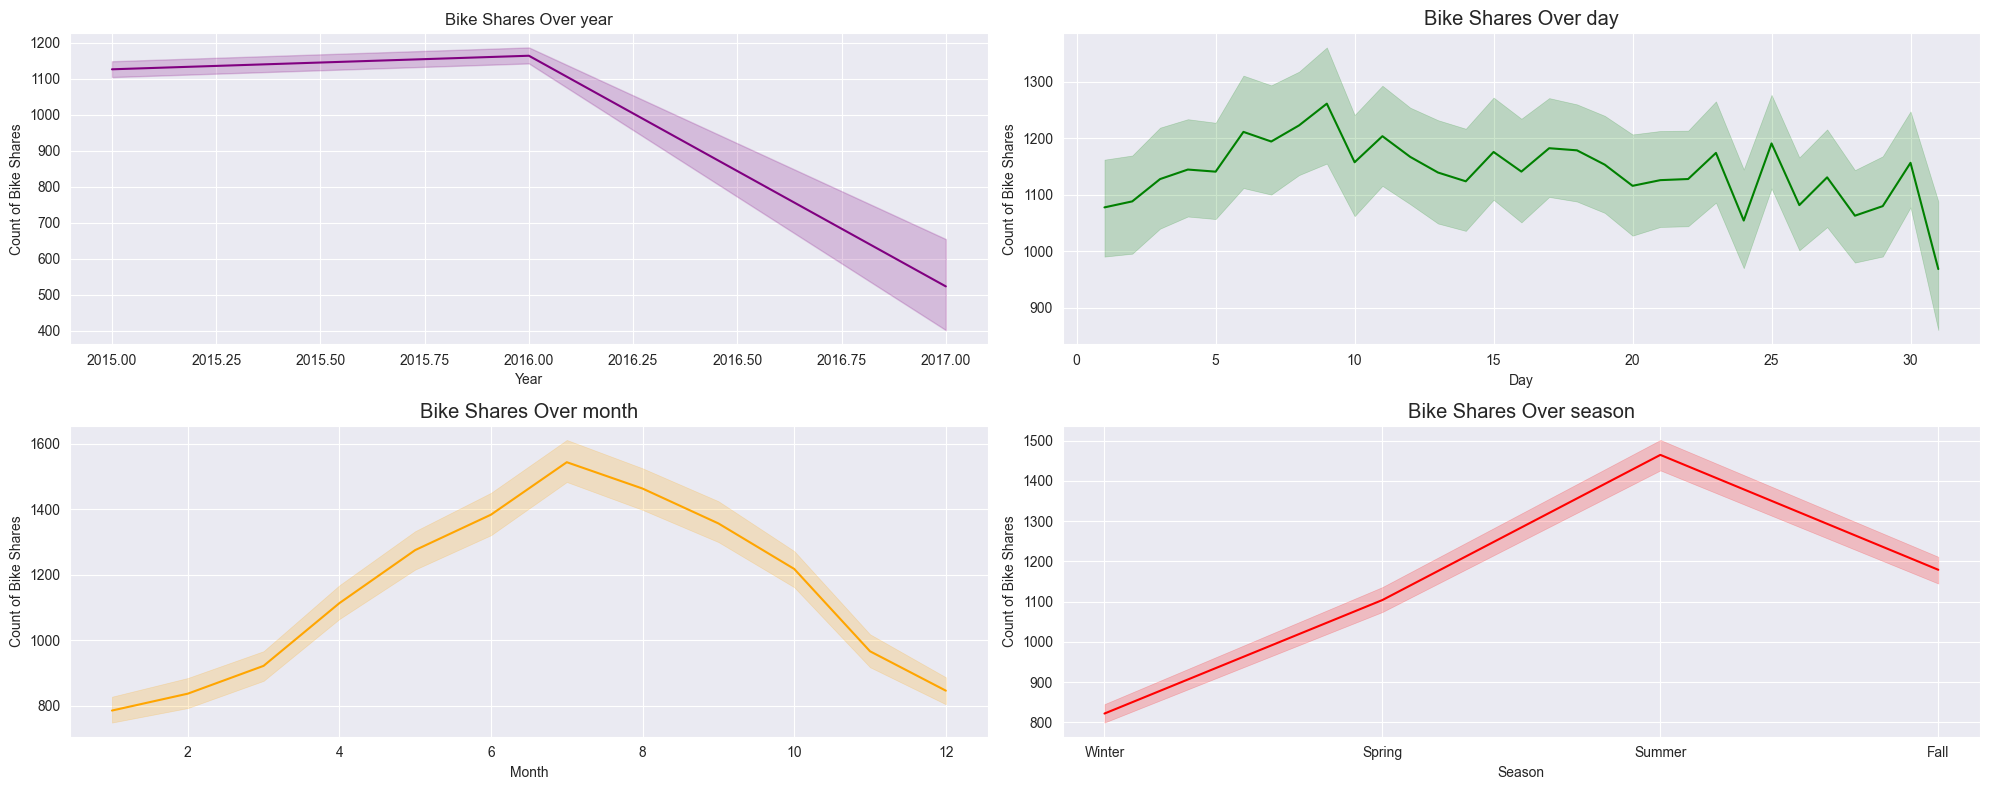

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))
season_mapping = {0: 'Spring', 1: 'Summer', 2: 'Fall', 3: 'Winter'}


sns.lineplot(x='year', y='cnt', data=df, color='purple', ax=axes[0][0])
axes[0][0].set_title('Bike Shares Over year')
axes[0][0].set_xlabel('Year')
axes[0][0].set_ylabel('Count of Bike Shares')
plt.style.use('ggplot')

sns.lineplot(x='month', y='cnt', data=df, color='orange', ax=axes[1][0])
axes[1][0].set_title('Bike Shares Over month')
axes[1][0].set_xlabel('Month')
axes[1][0].set_ylabel('Count of Bike Shares')


sns.lineplot(x='day', y='cnt', data=df, color='green', ax=axes[0][1])
axes[0][1].set_title('Bike Shares Over day')
axes[0][1].set_xlabel('Day')
axes[0][1].set_ylabel('Count of Bike Shares')


sns.lineplot(x=df['season'].map(season_mapping), y='cnt', data=df, color='red', ax=axes[1][1])
axes[1][1].set_title('Bike Shares Over season')
axes[1][1].set_xlabel('Season')
axes[1][1].set_ylabel('Count of Bike Shares')

plt.tight_layout()
plt.show()

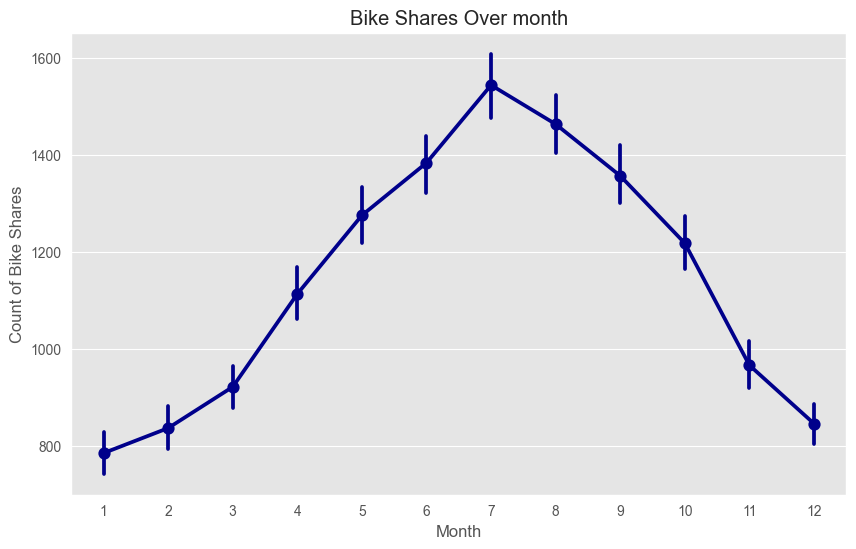

In [17]:
plt.figure(figsize=(10, 6))
sns.pointplot(x="month", y='cnt', data=df, color="darkblue")
plt.title('Bike Shares Over month')
plt.xlabel('Month')
plt.ylabel('Count of Bike Shares')
plt.show()

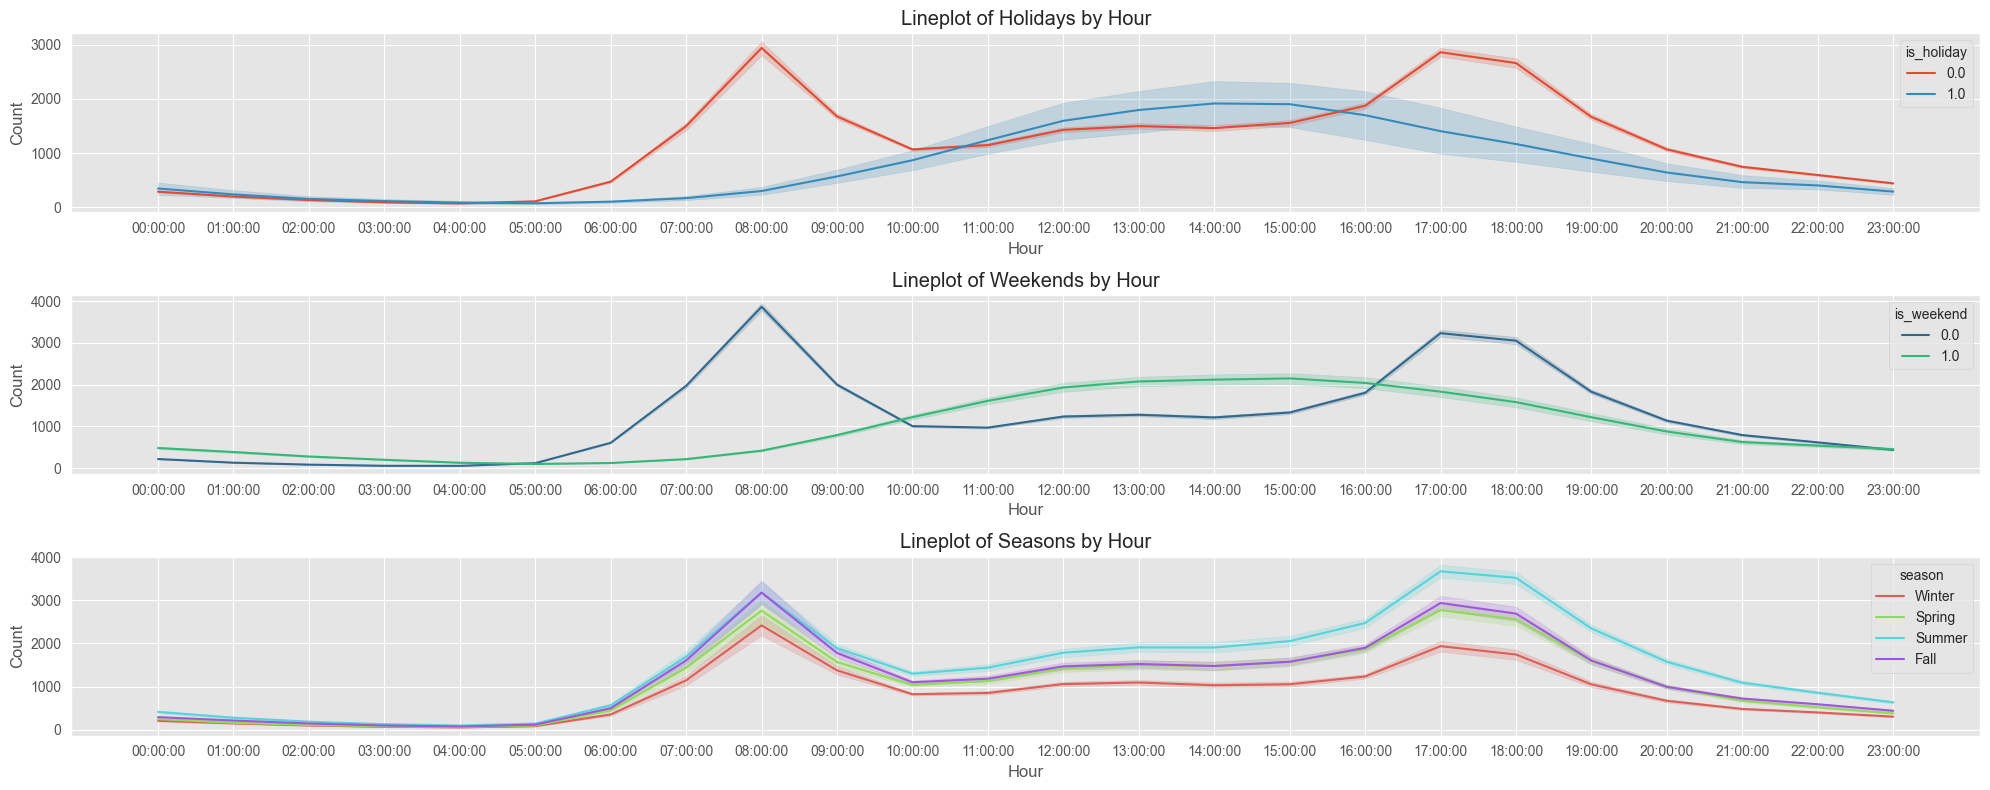

In [18]:
# Plotting using Seaborn
plt.figure(figsize=(20, 8))
season_mapping = {0: 'Spring', 1: 'Summer', 2: 'Fall', 3: 'Winter'}

# Lineplot
plt.subplot(3, 1, 1)
sns.lineplot(y=df.cnt, x=df.time.astype(str), color="red", hue=df.is_holiday)
plt.title('Lineplot of Holidays by Hour')

plt.xlabel('Hour')
plt.ylabel('Count')

# Pointplot
plt.subplot(3, 1, 2)
sns.lineplot(y=df.cnt, x=df.time.astype(str), hue=df.is_weekend, palette="viridis")
plt.title('Lineplot of Weekends by Hour')

plt.xlabel('Hour')
plt.ylabel('Count')

# Barplot
plt.subplot(3, 1, 3)
sns.lineplot(y=df.cnt, x=df.time.astype(str), palette="hls", hue=df['season'].map(season_mapping))
plt.title('Lineplot of Seasons by Hour')

plt.xlabel('Hour')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

C:\Users\belug\AppData\Local\Temp\ipykernel_4356\3702418030.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='year', y="cnt", hue= df['season'].map(season_mapping) , data=df[df['is_holiday'] == 1], ci=None, palette="Set1")


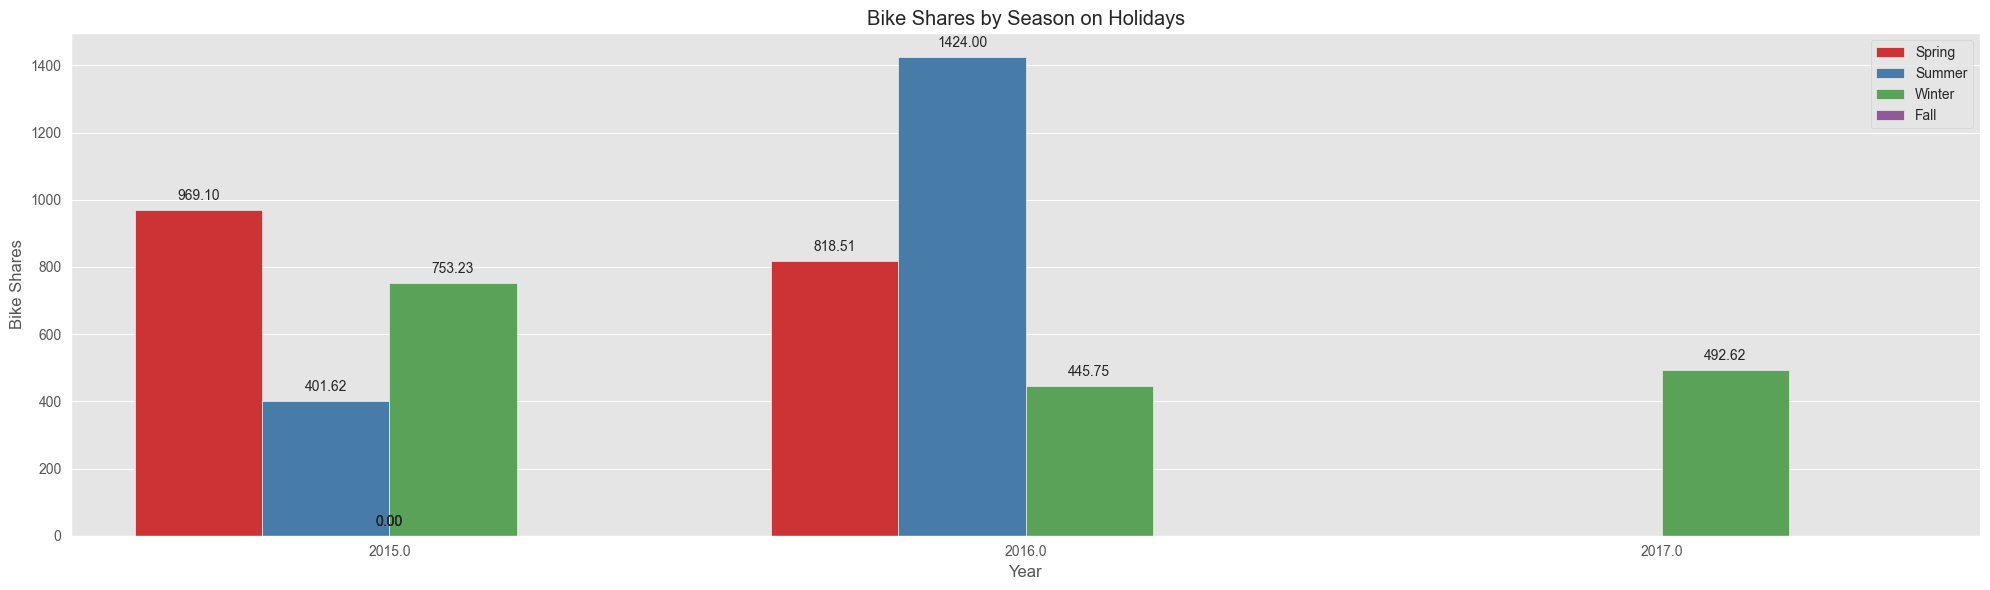

In [19]:
season_mapping = {0: 'Spring', 1: 'Summer', 2: 'Fall', 3: 'Winter'}

plt.figure(figsize=(20, 6))

ax = sns.barplot(x='year', y="cnt", hue= df['season'].map(season_mapping) , data=df[df['is_holiday'] == 1], ci=None, palette="Set1")
plt.title('Bike Shares by Season on Holidays')
plt.xlabel('Year')
plt.ylabel('Bike Shares')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
plt.tight_layout()
plt.legend()
plt.show()

C:\Users\belug\AppData\Local\Temp\ipykernel_4356\240558635.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=df['season'].map(season_mapping), data=df, palette="muted", y="cnt", hue=df['weather_code'].map(weather_mapping), ci=None)


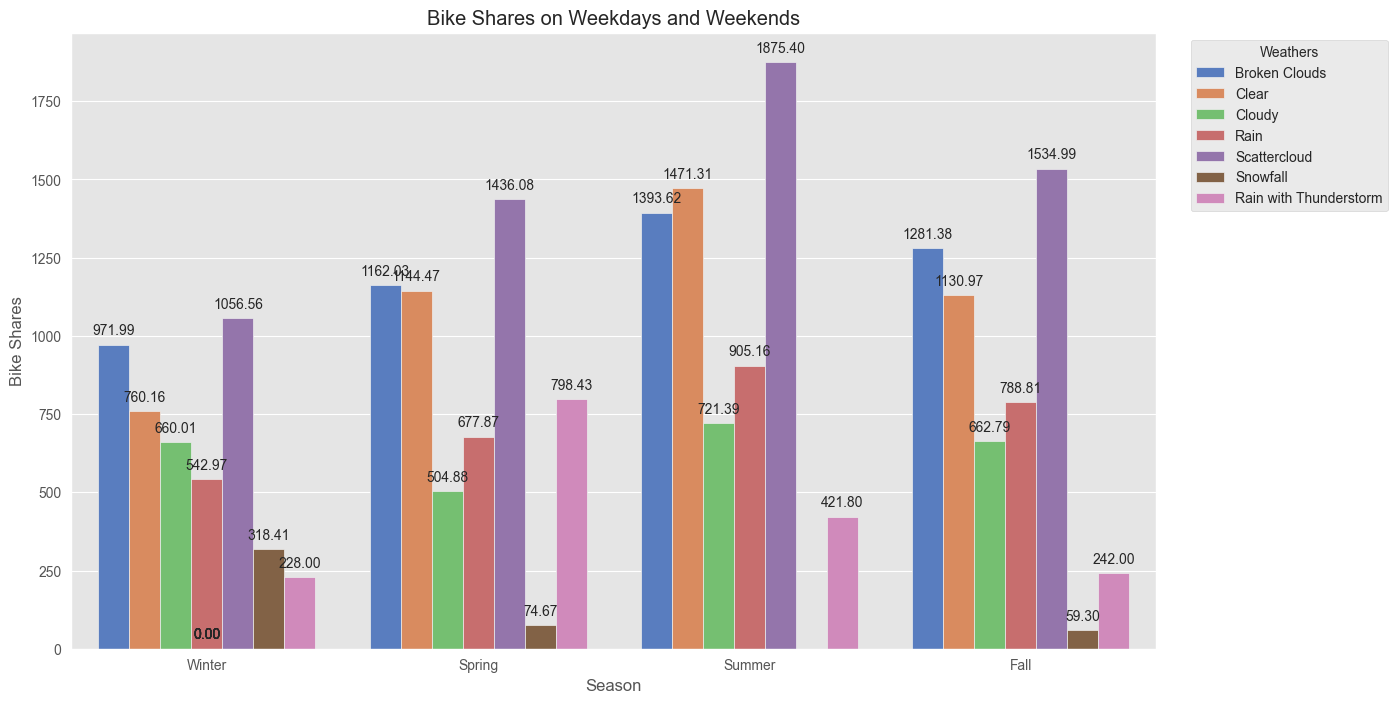

In [20]:
weather_mapping = {1: 'Clear', 2: 'Scattercloud', 3: "Broken Clouds", 4: "Cloudy", 7: "Rain", 10: "Rain with Thunderstorm", 26: "Snowfall", 94: "Freezing Fog"}
season_mapping = {0: 'Spring', 1: 'Summer', 2: 'Fall', 3: 'Winter'}

plt.figure(figsize=(14, 8))
ax = sns.barplot(x=df['season'].map(season_mapping), data=df, palette="muted", y="cnt", hue=df['weather_code'].map(weather_mapping), ci=None)
plt.title('Bike Shares on Weekdays and Weekends')
plt.xlabel('Season')
plt.ylabel('Bike Shares')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.legend(bbox_to_anchor = (0.72, 0.5, 0.5, 0.5), title= 'Weathers')
plt.show()

##Prediction


In [100]:
X = df.drop(['cnt','timestamp', 'date', 'time'], axis=1)


In [101]:
X

,year,month,day,hour,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015,1,4,0,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015,1,4,1,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015,1,4,2,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015,1,4,3,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015,1,4,4,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017,1,3,19,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017,1,3,20,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017,1,3,21,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017,1,3,22,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [102]:
Y = df['cnt']

In [103]:
Y

0         182
1         138
2         134
3          72
4          47
         ... 
17409    1042
17410     541
17411     337
17412     224
17413     139
Name: cnt, Length: 17414, dtype: int64

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=101)

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [106]:
import xgboost as xgb

In [107]:
regressor=xgb.XGBRegressor(eval_metric='rmse')

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
param_grid = {"n_estimators":[200, 400, 500],'max_depth':[4,5,6]}

In [110]:
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'max_depth': 6, 'n_estimators': 500}


In [111]:
regressor=xgb.XGBRegressor(
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],
                           eval_metric='rmse')
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [112]:
predictions = regressor.predict(X_test)

In [113]:
from sklearn.metrics import mean_squared_error
RMSLE = np.sqrt( mean_squared_error(y_test, predictions) )
print("The score is %.5f" % RMSLE )

The score is 198.01952
